In [ ]:
pip install opencv-python

In [ ]:
pip install pillow

In [ ]:
pip install pixellib

In [ ]:
pip install keras

In [ ]:
pip install scikit-image

In [ ]:
pip install tensorflow-gpu


In [42]:
import cv2

In [32]:
from pixellib.torchbackend.instance import instanceSegmentation

In [45]:
import pixellib

In [46]:
import PIL

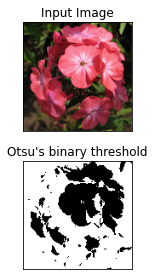

In [54]:
# SEGMENTATION
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread(r'/content/drive/MyDrive/Image processing/project/flower_images/0001.png')
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# noise removal
kernel = np.ones((2,2),np.uint8)
#opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(closing,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(sure_bg,cv2.DIST_L2,3)
# Threshold
ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
plt.subplot(211),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(thresh, 'gray')
plt.imsave(r'thresh.png',thresh)
plt.title("Otsu's binary threshold"), plt.xticks([]), plt.yticks([])
plt.tight_layout()

#Filtering the image
blur=cv2.bilateralFilter(img,15,75,75)   #bilateral filter helps in noice reduction and edge smoothening

plt.show()

In [53]:
import pixellib
from pixellib.torchbackend.instance import instanceSegmentation

ins = instanceSegmentation()
ins.load_model("/content/drive/MyDrive/Image processing/pointrend_resnet50.pkl")
ins.segmentImage("/content/drive/MyDrive/Image processing/project/flower_images/0005.png", show_bboxes=True, output_image_name="/content/drive/MyDrive/Image processing/project/Output/0005(seg).png")

The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}
/usr/local/lib/python3.7/dist-packages/pixellib/torchbackend/instance/structures/image_list.py:99: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride
/usr/local/lib/python3.7/dist-packages/pixellib/torchbackend/instance/point_rend/point_features.py:152: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative valu

({'boxes': array([[  4,   4, 125, 120]]),
  'class_ids': array([25]),
  'class_names': ['umbrella'],
  'extracted_objects': [],
  'masks': array([[[False],
          [False],
          [False],
          ...,
          [False],
          [False],
          [False]],
  
         [[False],
          [False],
          [False],
          ...,
          [False],
          [False],
          [False]],
  
         [[False],
          [False],
          [False],
          ...,
          [False],
          [False],
          [False]],
  
         ...,
  
         [[False],
          [False],
          [False],
          ...,
          [False],
          [False],
          [False]],
  
         [[False],
          [False],
          [False],
          ...,
          [False],
          [False],
          [False]],
  
         [[False],
          [False],
          [False],
          ...,
          [False],
          [False],
          [False]]]),
  'object_counts': Counter({'umbrella': 1}),
  's